In [1]:
# Задание 2 
# Загрузите датасет и проведите первичный анализ, чтобы лучше понять структуру датасета и оценить эффективность проведённого A/B-теста:
# Посмотрите распределение целевой переменной target (факт перехода клиента на тариф Комфорт) в разрезе контрольной 
# и тестовой групп с помощью функции groupby в pandas. Это позволит оценить, насколько эффективным было маркетинговое воздействие.
# Проверьте датасет на пропущенные значения, чтобы убедиться в качестве данных перед построением модели.
# Эти шаги помогут понять, есть ли статистически значимая разница между группами, а также подготовить данные для дальнейшего моделирования.

import pandas as pd
# загружаем данные
data = pd.read_csv("ab_results.csv")

grouped_data = (data
    .groupby("treatment")['target']
    .agg(["mean"])

)
print(data.info())
print(grouped_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   usage_duration                   400000 non-null  float64
 1   number_of_bank_cards             400000 non-null  int64  
 2   money_spent_amount               400000 non-null  float64
 3   visit_frequency                  400000 non-null  float64
 4   number_of_visited_shops          400000 non-null  int64  
 5   number_of_viewed_communications  400000 non-null  int64  
 6   age                              400000 non-null  float64
 7   treatment                        400000 non-null  int64  
 8   target                           400000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 27.5 MB
None
               mean
treatment          
0          0.193715
1          0.293995


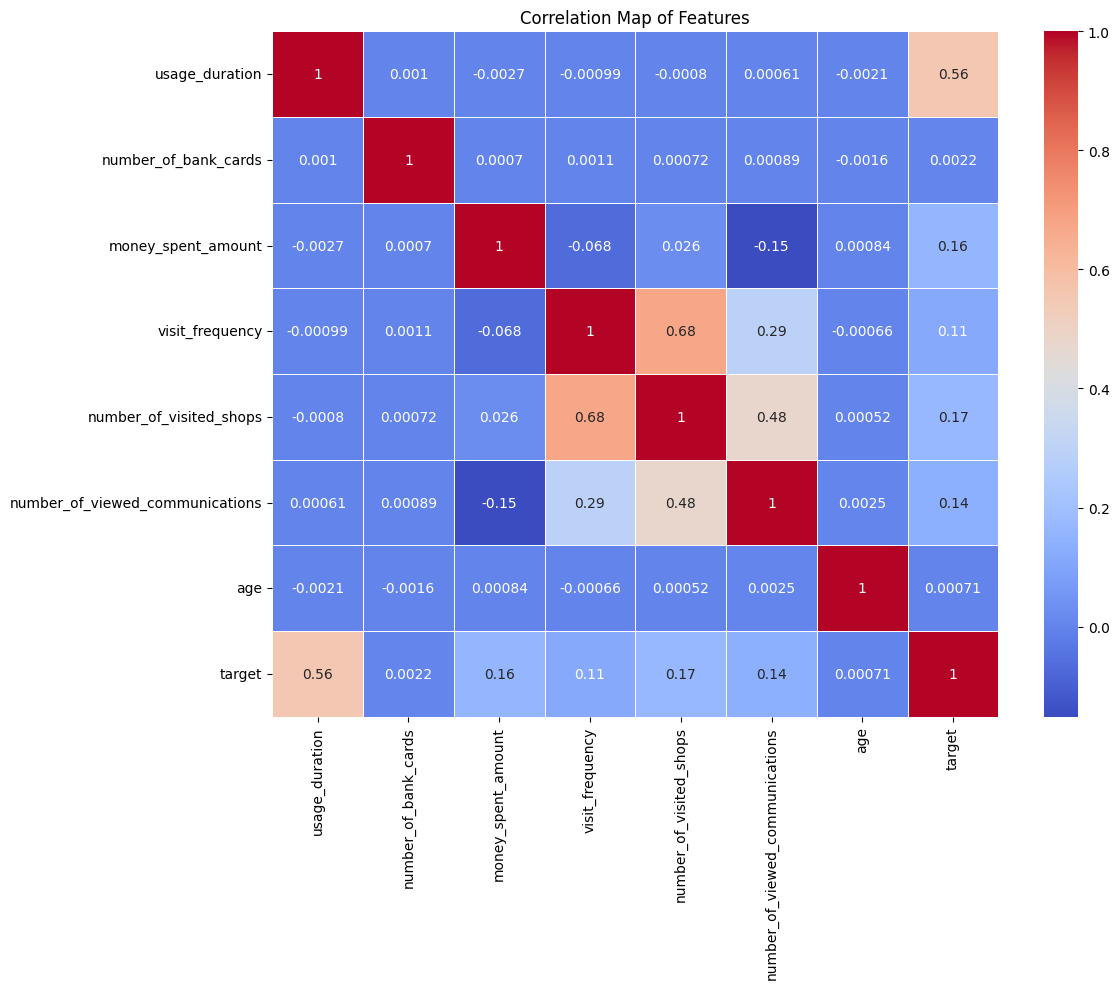

In [2]:
# Задание 4
# Запустите следующий код для построения матрицы корреляций.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# загружаем данные
data = pd.read_csv("ab_results.csv")

plt.figure(figsize=(12, 10))
correlation_matrix = (data
                     .drop(columns=['treatment'])
                     .corr()
                    )
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map of Features')
plt.tight_layout()
plt.show()

In [3]:
# Чтобы реализовать uplift-деревья, нам потребуется класс модели UpliftRandomForestClassifier, доступный в модуле inference.tree библиотеки causalml. Импорт модели будет осуществляться так:

from causalml.inference.tree import UpliftRandomForestClassifier

import pandas as pd

# загрузка датасета
data = pd.read_csv("ab_results.csv")


Failed to import duecredit due to No module named 'duecredit'


In [4]:
data

,usage_duration,number_of_bank_cards,money_spent_amount,visit_frequency,number_of_visited_shops,number_of_viewed_communications,age,treatment,target
0,4.675074,1,463182.628027,6.782820,4,58,65.529513,0,0
1,4.315465,1,379881.205811,6.947705,3,81,41.285985,1,0
2,5.135106,1,528345.551898,8.665648,7,89,39.280205,1,1
3,4.357843,1,568219.437346,5.002878,3,46,47.544483,1,0
4,4.518232,1,340441.730023,6.979684,5,58,56.911754,0,0
...,...,...,...,...,...,...,...,...,...
399995,6.591719,1,529039.127112,6.701321,3,70,39.412018,1,1
399996,1.389599,1,525259.159120,5.497358,3,59,51.207295,0,0
399997,4.220414,1,519899.700921,6.544434,3,66,45.253439,0,0
399998,6.497928,1,548193.088969,4.539447,2,66,42.603539,0,0


In [5]:

# Преобразуем treatment в строки
data['treatment'] = data['treatment'].map({0: 'control', 1: 'treatment'})

# разделение на признаки и целевую переменную
X = data.drop(['target'], axis=1)
y = data['target'] 

In [6]:
data

,usage_duration,number_of_bank_cards,money_spent_amount,visit_frequency,number_of_visited_shops,number_of_viewed_communications,age,treatment,target
0,4.675074,1,463182.628027,6.782820,4,58,65.529513,control,0
1,4.315465,1,379881.205811,6.947705,3,81,41.285985,treatment,0
2,5.135106,1,528345.551898,8.665648,7,89,39.280205,treatment,1
3,4.357843,1,568219.437346,5.002878,3,46,47.544483,treatment,0
4,4.518232,1,340441.730023,6.979684,5,58,56.911754,control,0
...,...,...,...,...,...,...,...,...,...
399995,6.591719,1,529039.127112,6.701321,3,70,39.412018,treatment,1
399996,1.389599,1,525259.159120,5.497358,3,59,51.207295,control,0
399997,4.220414,1,519899.700921,6.544434,3,66,45.253439,control,0
399998,6.497928,1,548193.088969,4.539447,2,66,42.603539,control,0


In [7]:
uniq_y = y.unique()
print(uniq_y) 

[0 1]


In [8]:
# Преобразование сделано! Теперь вы готовы к подаче данных на модель. Разделим наши данные на тренировочную и валидационную выборки, а также инициализируем нашу модель:

from sklearn.model_selection import train_test_split
# разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# создаём модель Uplift Random Forest, указывая название контрольной группы
uplift_model = UpliftRandomForestClassifier(control_name = 'control')

In [9]:
uplift_model.fit(X_train.drop(columns=['treatment']).values,
                 treatment=X_train['treatment'].values,
                 y=y_train.values)

In [ ]:
# Задание 7
# Получите предсказания для обученной модели и напечатайте их. 
# Обученная ранее модель уже хранится в вашем juputer ноутбуке, поэтому результат выполнения предыдущего задания не нужно удалять.
# Получение предсказаний для uplift-моделей из библиотеки causalml ничем не отличается от стандартного получения предсказаний 
# для любой другой классической модели машинного обучения. 
# Вызовите метод predict(), который позволит вам сделать предсказания, 
# и подайте ему валидационные данные как параметр (не забудьте исключить из них колонку treatment), 
# а также установите значение параметра full_output=False. Чуть позже мы расскажем, для чего это нужно.


# предсказываем uplift (эффект воздействия) на валидационной выборке
uplift_scores = uplift_model.predict(X_val.drop(columns=['treatment']), full_output=False)

print(uplift_scores)

[[0.0564183 ]
 [0.82487919]
 [0.11770284]
 ...
 [0.02062963]
 [0.02062963]
 [0.94194707]]


In [ ]:
# Задание 8
# Ранее вы выделяли топ-5% клиентов по uplift-скору. Код ниже делает именно это — запустите его.

import numpy as np
top_percent = 0.05

# сортируем массив в убывающем порядке
top_5_percent = np.sort(uplift_scores)[::-1][:int(len(uplift_scores) * top_percent)]

print(f"Количество клиентов в верхних 5%: {len(top_5_percent)}")
print(f"Минимальное значение uplift в верхних 5%: {np.min(top_5_percent):.2f}")
print(f"Максимальное значение uplift в верхних 5%: {np.max(top_5_percent):.2f}")
print(f"Среднее значение uplift: {np.mean(top_5_percent):.2f}")


Количество клиентов в верхних 5%: 6000
Минимальное значение uplift в верхних 5%: 0.01
Максимальное значение uplift в верхних 5%: 0.96
Среднее значение uplift: 0.10


In [12]:
# Посмотреть структуру файла предсказаний
print(pd.read_csv('predictions_less4.csv').head())
print(pd.read_csv('predictions_less4.csv').columns)

      preds
0  0.009957
1  0.859843
2  0.098078
3  0.040980
4  0.144632
Index(['preds'], dtype='object')


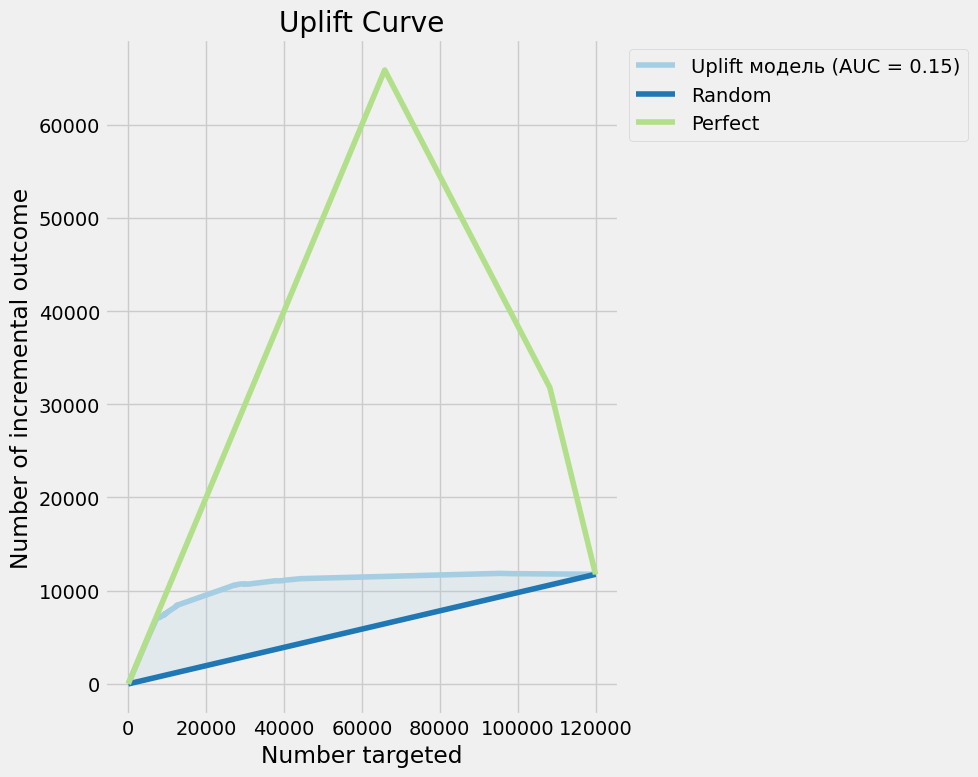

In [14]:
# Задание 10
# Постройте график uplift-кривой. 
# Предсказания модели для валидационной выборки сохранены в файл predictions.csv. 
# Датасет уже прочитан и разделён на валидационный и тренировочный наборы, 
# то есть вам доступны к использованию переменные X_train, X_val, y_train, y_val. 
# Загрузите предсказания и поместите их в переменную uplift_preds. 
# Данные о воздействии поместите в переменную treatment из X_val. 

import pandas as pd
import matplotlib.pyplot as plt
from sklift.viz import plot_uplift_curve

# загрузите predictions.csv
uplift_preds = pd.read_csv('predictions_less4.csv')['preds'].values
treatment = X_val['treatment']

treatment_mapping = {
    'control': 0, 
    'treatment': 1,  
}

# применяем маппинг к столбцу treatment
treatment = treatment.map(treatment_mapping)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# постройте график uplift-кривой 
plot_uplift_curve(y_val, uplift_preds, treatment, random=True, name='Uplift модель', ax=ax)
ax.set_title('Uplift Curve')
ax.grid(True)

plt.tight_layout()
plt.show()

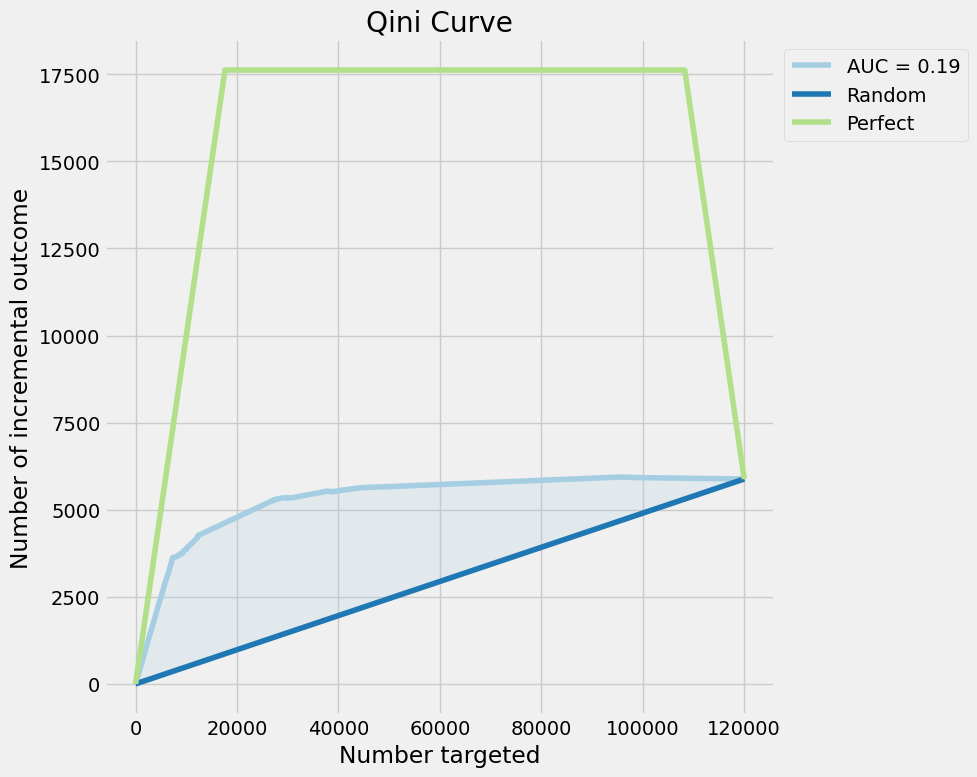

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklift.viz import plot_qini_curve


fig, axs = plt.subplots(1, 1, figsize=(10, 8))

plot_qini_curve(y_val, uplift_preds, treatment, ax=axs)
axs.set_title('Qini Curve')
axs.grid(True)

plt.tight_layout()
plt.show()
